In [11]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()

    series_labels = pd.DataFrame(list_labels)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels['label'].unique()

print df_labels.head()
print df_labels.tail()

['functional' 'non functional' 'functional needs repair']
      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [2]:

def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps)

    return df_pumps

df_data = load_wells()

df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [3]:
df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels.head()
print df_labels.tail()

      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [4]:
df_labels = df_labels.sort(['id'])

print df_labels.head()
print df_labels.tail()

       id           label
9410    0  non functional
18428   1      functional
12119   2      functional
10629   3      functional
2343    4  non functional
          id           label
15137  74240      functional
8667   74242      functional
22584  74243  non functional
108    74246  non functional
39131  74247  non functional


In [5]:
print df_data.head()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [6]:
df_data = df_data.sort(['id'])

print df_data.head()
print df_data.tail()

       id  amount_tsh date_recorded           funder  gps_height installer  \
9425    0           0    2012-11-13            Tasaf           0     TASAF   
18440   1           0    2011-03-05            Shipo        1978     SHIPO   
12134   2           0    2011-03-27             Lvia           0      LVIA   
10644   3          10    2013-06-03  Germany Republi        1639       CES   
2350    4           0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name num_private          ...           \
9425   33.125828 -5.118154         Mratibu           0          ...            
18440  34.770717 -9.395642            none           0          ...            
12134  36.115056 -6.279268         Bombani           0          ...            
10644  37.147432 -3.187555  Area 7 Namba 5           0          ...            
2350   36.164893 -6.099289         Ezeleda           0          ...            

      payment_type water_quality quality_group    

In [35]:

df_complete = pd.concat([df_labels,df_data],axis=1)

print df_complete.head()
print df_complete.shape

      id  label     id  amount_tsh date_recorded        funder  gps_height  \
0  69572      1  69572        6000    2011-03-14         Roman        1390   
1   8776      1   8776           0    2013-03-06       Grumeti        1399   
2  34310      1  34310          25    2013-02-25  Lottery Club         686   
3  67743      2  67743           0    2013-01-28        Unicef         263   
4  19728      1  19728           0    2011-07-13   Action In A           0   

      installer  longitude   latitude          ...           payment_type  \
0         Roman  34.938093  -9.856322          ...               annually   
1       GRUMETI  34.698766  -2.147466          ...              never pay   
2  World vision  37.460664  -3.821329          ...             per bucket   
3        UNICEF  38.486161 -11.155298          ...              never pay   
4       Artisan  31.130847  -1.825359          ...              never pay   

  water_quality  quality_group quantity quantity_group  source  \
0 

In [37]:
def code_df(df):
    a = df.basin.unique()
    df.basin.replace(a,(1,2,3,4,5,6,7,8,9),inplace=True)

    b = df.scheme_management.unique()
    df.scheme_management.replace(b,range(len(b)),inplace=True)

    c = df.extraction_type_class.unique()
    df.extraction_type_class.replace(c,range(len(c)),inplace=True)

    d = df.management_group.unique()
    df.management_group.replace(d,range(len(d)),inplace=True)

    e = df.payment.unique()
    df.payment.replace(e,range(len(e)),inplace=True)

    f = df.water_quality.unique()
    df.water_quality.replace(f,range(len(f)),inplace=True)

    g = df.quantity.unique()
    df.quantity.replace(g,range(len(g)),inplace=True)

    h = df.source.unique()
    df.source.replace(h,range(len(h)),inplace=True)

    i = df.source_class.unique()
    df.source_class.replace(i,range(len(i)),inplace=True)

    j = df.waterpoint_type.unique()
    df.waterpoint_type.replace(j,range(len(j)),inplace=True)

    return df

df_coded = code_df(df_complete)
print df_coded.head()
print df_coded.tail()

print df_coded.shape

      id  label     id  amount_tsh date_recorded        funder  gps_height  \
0  69572      1  69572        6000    2011-03-14         Roman        1390   
1   8776      1   8776           0    2013-03-06       Grumeti        1399   
2  34310      1  34310          25    2013-02-25  Lottery Club         686   
3  67743      2  67743           0    2013-01-28        Unicef         263   
4  19728      1  19728           0    2011-07-13   Action In A           0   

      installer  longitude   latitude          ...           payment_type  \
0         Roman  34.938093  -9.856322          ...               annually   
1       GRUMETI  34.698766  -2.147466          ...              never pay   
2  World vision  37.460664  -3.821329          ...             per bucket   
3        UNICEF  38.486161 -11.155298          ...              never pay   
4       Artisan  31.130847  -1.825359          ...              never pay   

  water_quality  quality_group quantity quantity_group  source  \
0 

[1 2 3]
[1 2 3]


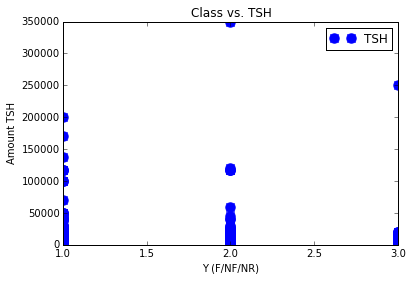

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

%matplotlib inline


y = df_coded['amount_tsh']
x = df_labels['label']

print df_labels['label'].unique()
print x.unique()

plt.plot(x, y, '.',markersize=20)
plt.legend(['TSH'])
plt.ylabel('Amount TSH')
plt.xlabel('Y (F/NF/NR)')
plt.title('Class vs. TSH')

plt.show()

In [109]:
import numpy as np
import matplotlib.pyplot as plt

df_labels_2 = load_labels()
df_labels_2.columns = ['id','label']
df_labels_2 = df_labels_2.sort(['id'])

df_data_2 = load_wells()

df_data_2.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

df_data_2 = df_data_2.sort(['id'])
print df_data_2.head()
print df_data_2.tail()

       id  amount_tsh date_recorded           funder  gps_height installer  \
9425    0           0    2012-11-13            Tasaf           0     TASAF   
18440   1           0    2011-03-05            Shipo        1978     SHIPO   
12134   2           0    2011-03-27             Lvia           0      LVIA   
10644   3          10    2013-06-03  Germany Republi        1639       CES   
2350    4           0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name num_private          ...           \
9425   33.125828 -5.118154         Mratibu           0          ...            
18440  34.770717 -9.395642            none           0          ...            
12134  36.115056 -6.279268         Bombani           0          ...            
10644  37.147432 -3.187555  Area 7 Namba 5           0          ...            
2350   36.164893 -6.099289         Ezeleda           0          ...            

      payment_type water_quality quality_group    

"\nbasin_functioning = df_complete.groupby(['label','basin'])\na = basin_functioning.size()\nprint a\nx1 = a[0:9]\nx2 = a[9:18]\nx3 = a[18:27]\n"

In [110]:
df_complete_2 = pd.concat([df_labels_2,df_data_2],axis=1)

print df_complete_2.head()
print df_complete_2.shape

      id           label     id  amount_tsh date_recorded        funder  \
0  69572      functional  69572        6000    2011-03-14         Roman   
1   8776      functional   8776           0    2013-03-06       Grumeti   
2  34310      functional  34310          25    2013-02-25  Lottery Club   
3  67743  non functional  67743           0    2013-01-28        Unicef   
4  19728      functional  19728           0    2011-07-13   Action In A   

   gps_height     installer  longitude   latitude          ...            \
0        1390         Roman  34.938093  -9.856322          ...             
1        1399       GRUMETI  34.698766  -2.147466          ...             
2         686  World vision  37.460664  -3.821329          ...             
3         263        UNICEF  38.486161 -11.155298          ...             
4           0       Artisan  31.130847  -1.825359          ...             

  payment_type water_quality quality_group      quantity quantity_group  \
0     annually   

In [114]:
basin_functioning = df_complete_2.groupby(['label','basin'])
basin_codes = df_complete_2['basin'].unique()

print basin_codes
a = basin_functioning.size()
print a
x1 = a[0:9]
x2 = a[9:18]
x3 = a[18:27]

['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
label                    basin                  
functional               Internal                   4234
                         Lake Nyasa                 2817
                         Lake Rukwa                 1311
                         Lake Tanganyika            3494
                         Lake Victoria              5557
                         Pangani                    4916
                         Rufiji                     4367
                         Ruvuma / Southern Coast    2345
                         Wami / Ruvu                3218
functional needs repair  Internal                    572
                         Lake Nyasa                  344
                         Lake Rukwa                  207
                         Lake Tanganyika             499
                         Lake Victoria               758
                    

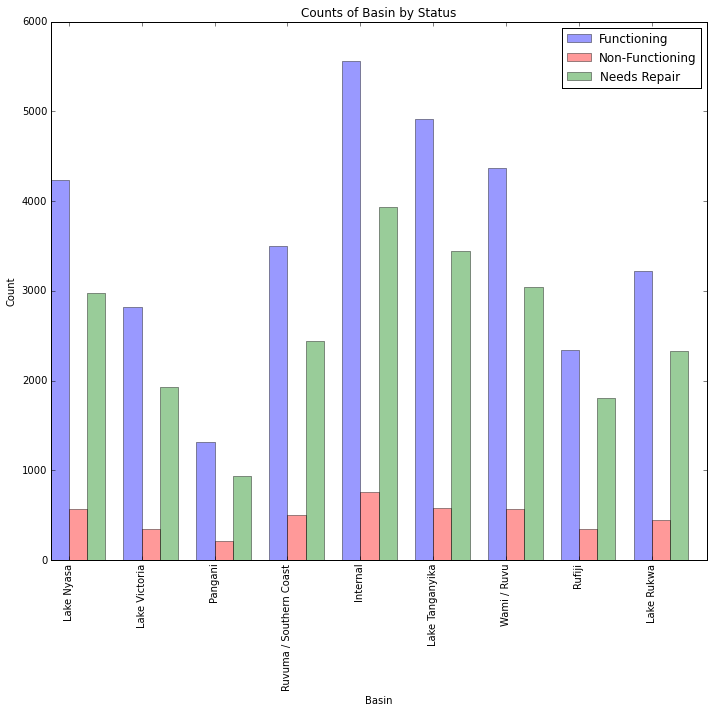

In [117]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 9

fig, ax = plt.subplots(figsize=(10,10))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')


plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Counts of Basin by Status')
plt.xticks(index + bar_width, basin_codes,rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [119]:
schm_functioning = df_complete_2.groupby(['label','scheme_management'])
x = schm_functioning.size()
schm_codes = df_complete_2['scheme_management'].unique()
print df_complete_2.scheme_management.unique()

['VWC' 'Other' None 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


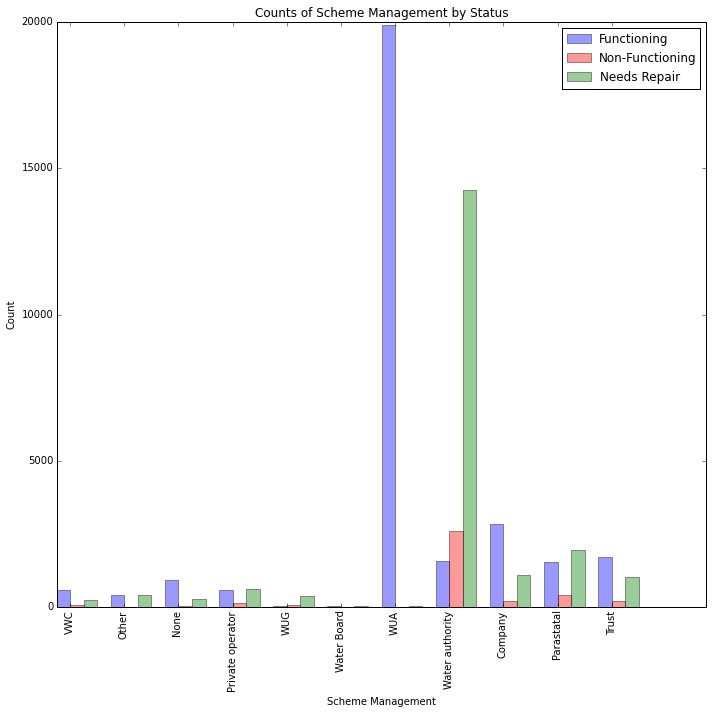

In [122]:
x1 = x[0:11]
x2 = x[11:22]
x3 = x[22:33]

n_groups = 11

fig, ax = plt.subplots(figsize=(10,10))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Counts of Scheme Management by Status')
plt.xticks(index + bar_width, schm_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

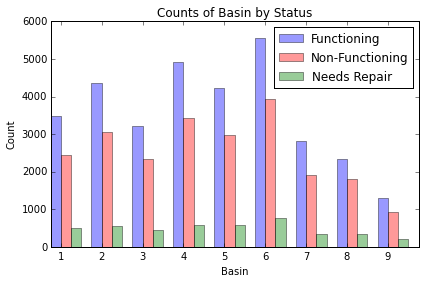

In [81]:
basin_functioning = df_coded.groupby(['label','basin'])
a = basin_functioning.size()

x1 = a[0:9]
x2 = a[9:18]
x3 = a[18:27]

import numpy as np
import matplotlib.pyplot as plt


n_groups = 9

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Counts of Basin by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7','8','9'))
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
schm_functioning = df_coded.groupby(['label','scheme_management'])
x = schm_functioning.size()
print df_coded.scheme_management.unique()

[ 0  7  1  3  6  2  4  5  8  9 11 10 12]


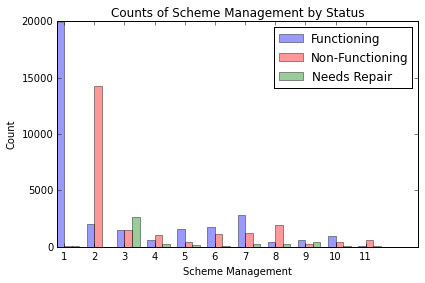

In [88]:
schm_functioning = df_coded.groupby(['label','scheme_management'])
a = schm_functioning.size()

x1 = a[0:11]
x2 = a[11:22]
x3 = a[22:33]

n_groups = 11

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Counts of Scheme Management by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7','8','9','10','11'))
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
etc_functioning = df_coded.groupby(['label','extraction_type_class'])
x = etc_functioning.size()
print x

label  extraction_type_class
1      0                         9109
       1                          248
       2                         1594
       3                        14664
       4                         3288
       5                         3300
       6                           56
2      0                         6198
       1                          176
       2                         1195
       3                        10147
       4                         2402
       5                         2655
       6                           51
3      0                         1149
       1                           27
       2                          198
       3                         1969
       4                          489
       5                          475
       6                           10
dtype: int64


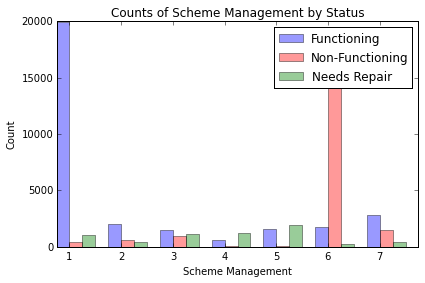

In [89]:
schm_functioning = df_coded.groupby(['label','scheme_management'])
a = schm_functioning.size()

x1 = a[0:7]
x2 = a[7:14]
x3 = a[14:21]

n_groups = 7

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Counts of Scheme Management by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7'))
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
mgg_functioning = df_coded.groupby(['label','management_group'])
x = mgg_functioning.size()
print df_coded.management_group.unique()
print x

[0 2 1 4 3]
label  management_group
1      0                   28487
       1                    1993
       2                     509
       3                     294
       4                     976
2      0                   20189
       1                    1375
       2                     366
       3                     230
       4                     664
3      0                    3814
       1                     270
       2                      68
       3                      37
       4                     128
dtype: int64


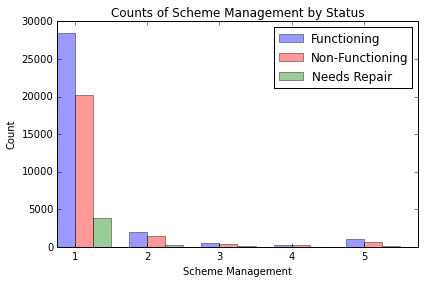

In [91]:
x1 = x[0:5]
x2 = x[5:10]
x3 = x[10:15]

n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Counts of Management Group by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7'))
plt.legend()

plt.tight_layout()
plt.show()

In [92]:
pay_functioning = df_coded.groupby(['label','payment'])
x = pay_functioning.size()
print df_coded.payment.unique()
print x

[5 1 2 0 3 6 4]
label  payment
1      0           4389
       1          13670
       2           4873
       3           2132
       4           4604
       5           2013
       6            578
2      0           3198
       1           9810
       2           3457
       3           1507
       4           3086
       5           1370
       6            396
3      0            570
       1           1868
       2            655
       3            275
       4            610
       5            259
       6             80
dtype: int64


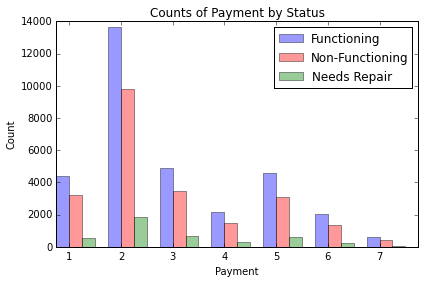

In [93]:
x1 = x[0:7]
x2 = x[7:14]
x3 = x[14:21]

n_groups = 7

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Payment')
plt.ylabel('Count')
plt.title('Counts of Payment by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7'))
plt.legend()

plt.tight_layout()
plt.show()

In [94]:
wtq_functioning = df_coded.groupby(['label','water_quality'])
x = wtq_functioning.size()
print df_coded.water_quality.unique()
print x

[1 2 0 5 6 4 3 7]
label  water_quality
1      0                  427
       1                27762
       2                 2569
       3                  173
       4                  275
       5                  943
       6                   99
       7                   11
2      0                  314
       1                19373
       2                 1958
       3                  128
       4                  179
       5                  785
       6                   82
       7                    5
3      0                   63
       1                 3683
       2                  329
       3                   38
       4                   36
       5                  148
       6                   19
       7                    1
dtype: int64


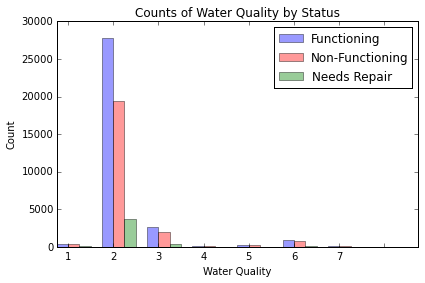

In [95]:
x1 = x[0:8]
x2 = x[8:16]
x3 = x[16:24]

n_groups = 8

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.title('Counts of Water Quality by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5','6','7'))
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
qty_functioning = df_coded.groupby(['label','quantity'])
x = qty_functioning.size()
print df_coded.quantity.unique()
print x

[0 1 2 3 4]
label  quantity
1      0           18212
       1            8230
       2            3176
       3            2244
       4             397
2      0           12539
       1            5801
       2            2653
       3            1492
       4             339
3      0            2435
       1            1098
       2             417
       3             314
       4              53
dtype: int64


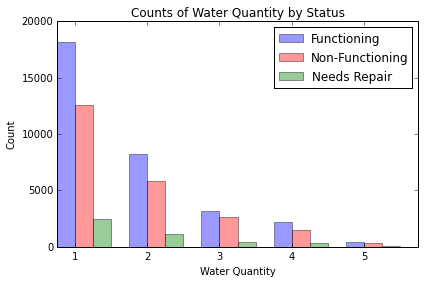

In [97]:
x1 = x[0:5]
x2 = x[5:10]
x3 = x[10:15]

n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Quantity')
plt.ylabel('Count')
plt.title('Counts of Water Quantity by Status')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

In [98]:
src_functioning = df_coded.groupby(['label','source'])
x = src_functioning.size()
print df_coded.source.unique()
print x

[2 3 7 1 6 0 4 8 5 9]
label  source
1      0         9167
       1         5946
       2         9397
       3         1230
       4         5171
       5          380
       6          120
       7          339
       8          477
       9           32
2      0         6481
       1         4307
       2         6406
       3          888
       4         3708
       5          322
       6           72
       7          278
       8          330
       9           32
3      0         1176
       1          822
       2         1218
       3          177
       4          733
       5           63
       6           20
       7           39
       8           67
       9            2
dtype: int64


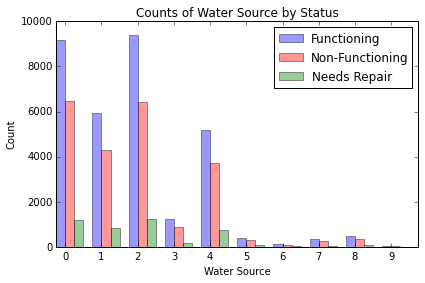

In [99]:
x1 = x[0:10]
x2 = x[10:20]
x3 = x[20:30]

n_groups = 10

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Source')
plt.ylabel('Count')
plt.title('Counts of Water Source by Status')
plt.xticks(index + bar_width, ('0','1', '2', '3', '4', '5','6','7','8','9'))
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
srcl_functioning = df_coded.groupby(['label','source_class'])
x = srcl_functioning.size()
print df_coded.source_class.unique()
print x

[0 1 2]
label  source_class
1      0               24987
       1                7120
       2                 152
2      0               17524
       1                5196
       2                 104
3      0                3283
       1                1012
       2                  22
dtype: int64


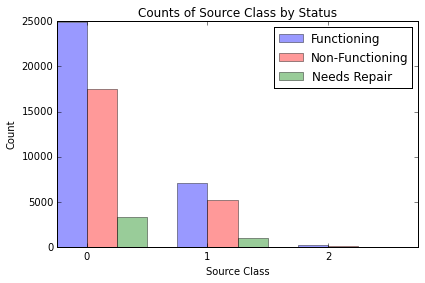

In [101]:
x1 = x[0:3]
x2 = x[3:6]
x3 = x[6:9]

n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Source Class')
plt.ylabel('Count')
plt.title('Counts of Source Class by Status')
plt.xticks(index + bar_width, ('0','1', '2', '3'))
plt.legend()

plt.tight_layout()
plt.show()

In [102]:
wtp_functioning = df_coded.groupby(['label','waterpoint_type'])
x = wtp_functioning.size()
print df_coded.waterpoint_type.unique()
print x

[2 1 0 3 4 5 6]
label  waterpoint_type
1      0                   9647
       1                   3213
       2                  15556
       3                   3298
       4                    466
       5                     75
       6                      4
2      0                   6638
       1                   2422
       2                  10862
       3                   2606
       4                    257
       5                     36
       6                      3
3      0                   1203
       1                    468
       2                   2104
       3                    476
       4                     61
       5                      5
dtype: int64


AssertionError: incompatible sizes: argument 'height' must be length 7 or scalar

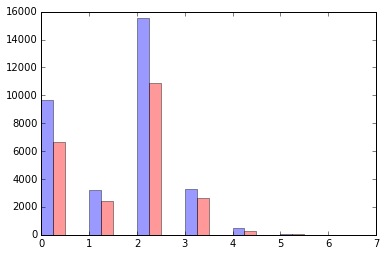

In [104]:
x1 = x[0:7]
x2 = x[7:14]
x3 = x[14:21]

n_groups = 7

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.title('Counts of Water Point Type by Status')
plt.xticks(index + bar_width, ('0','1', '2', '3','4','5', '6','7'))
plt.legend()

plt.tight_layout()
plt.show()

<class 'pandas.core.series.Series'>
label  basin
1      1        3494
       2        4367
       3        3218
       4        4916
       5        4234
       6        5557
       7        2817
       8        2345
       9        1311
dtype: int64
<class 'pandas.core.series.Series'>
0        7
1        6
2        4
3        8
4        6
5        4
6        5
7        1
8        1
9        6
10       3
11       7
12       5
13       4
14       5
15       1
16       2
17       2
18       6
19       7
20       7
21       6
22       2
23       4
24       1
25       4
26       8
27       6
28       4
29       4
        ..
59370    1
59371    6
59372    1
59373    9
59374    6
59375    4
59376    5
59377    5
59378    2
59379    6
59380    7
59381    4
59382    4
59383    8
59384    6
59385    6
59386    9
59387    3
59388    1
59389    1
59390    1
59391    4
59392    9
59393    5
59394    3
59395    4
59396    2
59397    2
59398    2
59399    3
Name: basin, dtype: int64


ValueError: x and y must have same first dimension

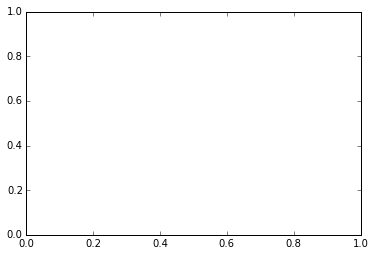

In [72]:




print type(x1)
print x1
y = df_coded['basin']
x = df_labels['label']

print type(y)
print y
plt.plot(x1, y, '.',markersize=10)
plt.legend(['Basin'])
plt.ylabel('Basin')
plt.xlabel('(Functioning/NonFunctioning/NeedsRepair)')
plt.title('Class vs. Basin')

plt.show()

plt.figure()
plt.hist(y, bins=9);
plt.title('Histogram of standardized deviance residuals')
plt.show()

[1 2 3]
[1 2 3]


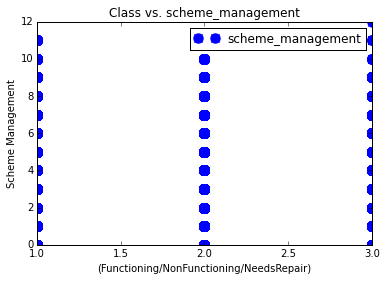

In [26]:
y = df_coded['scheme_management']
x = df_labels['label']

print df_labels['label'].unique()
print x.unique()

plt.plot(x, y, '.',markersize=20)
plt.legend(['scheme_management'])
plt.ylabel('Scheme Management')
plt.xlabel('(Functioning/NonFunctioning/NeedsRepair)')
plt.title('Class vs. scheme_management')

plt.show()

In [ ]:
y = df_coded['scheme_management']
x = df_labels['label']

print df_labels['label'].unique()
print x.unique()

plt.plot(x, y, '.',markersize=20)
plt.legend(['scheme_management'])
plt.ylabel('Scheme Management')
plt.xlabel('(Functioning/NonFunctioning/NeedsRepair)')
plt.title('Class vs. scheme_management')

plt.show()